In [51]:
import numpy as np
from scipy.stats import poisson, norm, gaussian_kde
import random
from scipy import interpolate
from math import factorial, e
from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline
from math import sqrt
from scipy.stats import norm
from scipy.stats import invgamma

Lab Objective: Understand the basic principles of implementing a Gibbs sampler. Apply this to
Latent Dirichlet Allocation.

# Problem 1

In [95]:
def gibbs(y, nu, tau2, alpha, beta, n_samples):
    """
    Assuming a likelihood and priors
    y_i ~ N(mu, sigma2),
    mu ~ N(nu, tau2),
    sigma2 ~ IG(alpha, beta),
    sample from the posterior distribution
    P(mu, sigma2 | y, nu, tau2, alpha, beta)
    using a gibbs sampler.
    Parameters
    ----------
    y : ndarray of shape (N,)
    The data
    nu : float
    The prior mean parameter for mu
    tau2 : float > 0
    The prior variance parameter for mu
    alpha : float > 0
    The prior alpha parameter for sigma2
    beta : float > 0
    The prior beta parameter for sigma2
    n_samples : int
    The number of samples to draw
    Returns
    -------
    samples : ndarray of shape (n_samples,2)
    1st col = mu samples, 2nd col = sigma2 samples
    """
    mu =  norm.rvs(nu, scale=sqrt(tau2))
    sigma2 = invgamma.rvs(alpha, scale=beta)
    samples = np.zeros((n_samples,2))
    #samples[0,0] = mu
    #samples[0,1] = sigma2
    N = len(y)
    for k in xrange(0,n_samples):
        for i in xrange(0,2):
            if i ==0:
                sigma_star = 1./(1./tau2+N/sigma2)
                mu_star = sigma_star*(nu/tau2+np.sum(y)/sigma2)
                mu =  norm.rvs(mu_star, scale=sqrt(sigma_star))
                samples[k,0] = mu
            else:
                alpha_star = alpha + N/2.
                beta_star = beta+.5*np.sum((y-mu)**2)
                sigma2 = invgamma.rvs(alpha_star, scale=beta_star)
                samples[k,1] = sigma2
    return samples

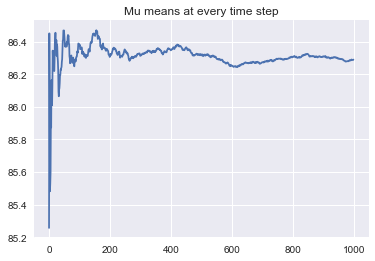

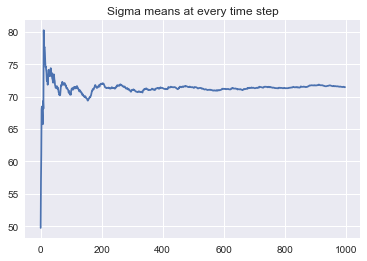

In [97]:
nu = 80.
tau2 = 16.
alpha = 3.
beta = 50.
n_samples = 1000
y = np.loadtxt('examscores.csv')
samples = gibbs(y, nu, tau2, alpha, beta, n_samples)

#here we make a list of our sample means for mu and sigma at every time step
means = [np.mean(samples[:i,0]) for i in range(1,n_samples)]
sigma_means = [np.mean(samples[:i,1]) for i in range(1,n_samples)]

plt.plot(means)
plt.title('Mu means at every time step')
plt.show()

plt.plot(sigma_means)
plt.title('Sigma means at every time step')
plt.show()

# Problem 2

Now I plot the kernal density estimators for the posterior distributions of mu and sigma squared.

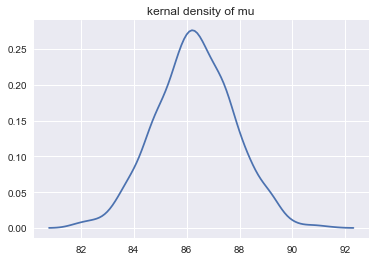

In [86]:
#Using code given in the lab we plot the kernal density of mu
mu_kernel = gaussian_kde(samples[:,0])
x_min = min(samples[:,0]) - 1
x_max = max(samples[:,0]) + 1
x = np.arange(x_min, x_max, step=0.1)
plt.plot(x,mu_kernel(x))
plt.title("kernal density of mu")

plt.show()

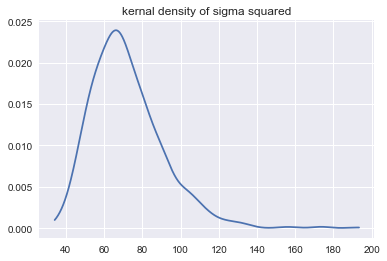

In [87]:
#Using code given in the lab we plot the kernal density of sigma squared
sigma_kernel = gaussian_kde(samples[:,1])
x_min = min(samples[:,1]) - 1
x_max = max(samples[:,1]) + 1
x = np.arange(x_min, x_max, step=0.1)
plt.plot(x,sigma_kernel(x))
plt.title("kernal density of sigma squared")
plt.show()

# Problem 3

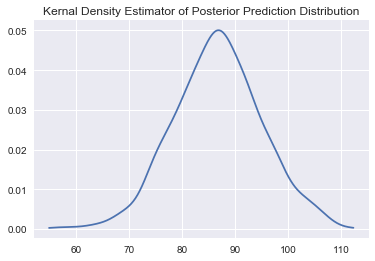

In [88]:
ppd_samples = np.zeros(1000)
#update our ppd_samples by drawing from the normal distribution with our updated mu and sigma2
for i in xrange(0,n_samples):
    ppd_samples[i] = norm.rvs(samples[i,0], scale=sqrt(samples[i,1]))

#Using the code from the lab we plot the kernal density function for the posterior prediction distribution
y_kernel = gaussian_kde(ppd_samples)
x_min = min(ppd_samples) - 1
x_max = max(ppd_samples) + 1
x = np.arange(x_min, x_max, step=0.1)
plt.plot(x,y_kernel(x))
plt.title("Kernal Density Estimator of Posterior Prediction Distribution")

plt.show()